# Этот набор данных позволяет предсказать наличие болезни Гипогликемии у некоторого количества жителей Филадельфии, исходя из набора определённых медицинских показателей.

**Подключение необходимых библиотек для первичной обработки исходных данных**

In [419]:
import pandas as pd
import numpy as np

**Вывод количества нулевых (недостающих) значений в каждом из атрибутов**

In [420]:
df = pd.read_csv('Hypoglycemia.csv', header=None)
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree','Age','Outcome']
print(df[df == 0].count(axis=0)/len(df.index))

Pregnancies      0.144531
Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
Pedigree         0.000000
Age              0.000000
Outcome          0.651042
dtype: float64


**Замена нулевых (недостающих) значений на их стандартное отклонение по столбцам.
Значения атрибутов 'Pregnancies' и 'Outcome' заменять на стандартные отклонения нет смысла, т.к. их исходные значения важны для успешной реализации алгоритмов.
Вывод нулевых (недостающих) значений в каждом из атрибутов после корректировки значений**

In [421]:

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].std())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].std())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].std())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].std())
df['BMI'] = df['BMI'].replace(0, df['BMI'].std())
print(df[df == 0].count(axis=0)/len(df.index))

Pregnancies      0.144531
Glucose          0.000000
BloodPressure    0.000000
SkinThickness    0.000000
Insulin          0.000000
BMI              0.000000
Pedigree         0.000000
Age              0.000000
Outcome          0.651042
dtype: float64


**Вывод статистической информации для атрибутов**

In [422]:
print('                                     Column Values')
print(df.head())
print()
print("DF Size:",df.shape)
print()
print("        Data Types:")
print(df.dtypes)

                                     Column Values
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  115.244002  33.6   
1            1     85.0           66.0      29.000000  115.244002  26.6   
2            8    183.0           64.0      15.952218  115.244002  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

DF Size: (768, 9)

        Data Types:
Pregnancies        int64
Glucose          float64
BloodPressure    float64
SkinThickness    float64
Insulin          float64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object


**Графическое построение зависимостей**

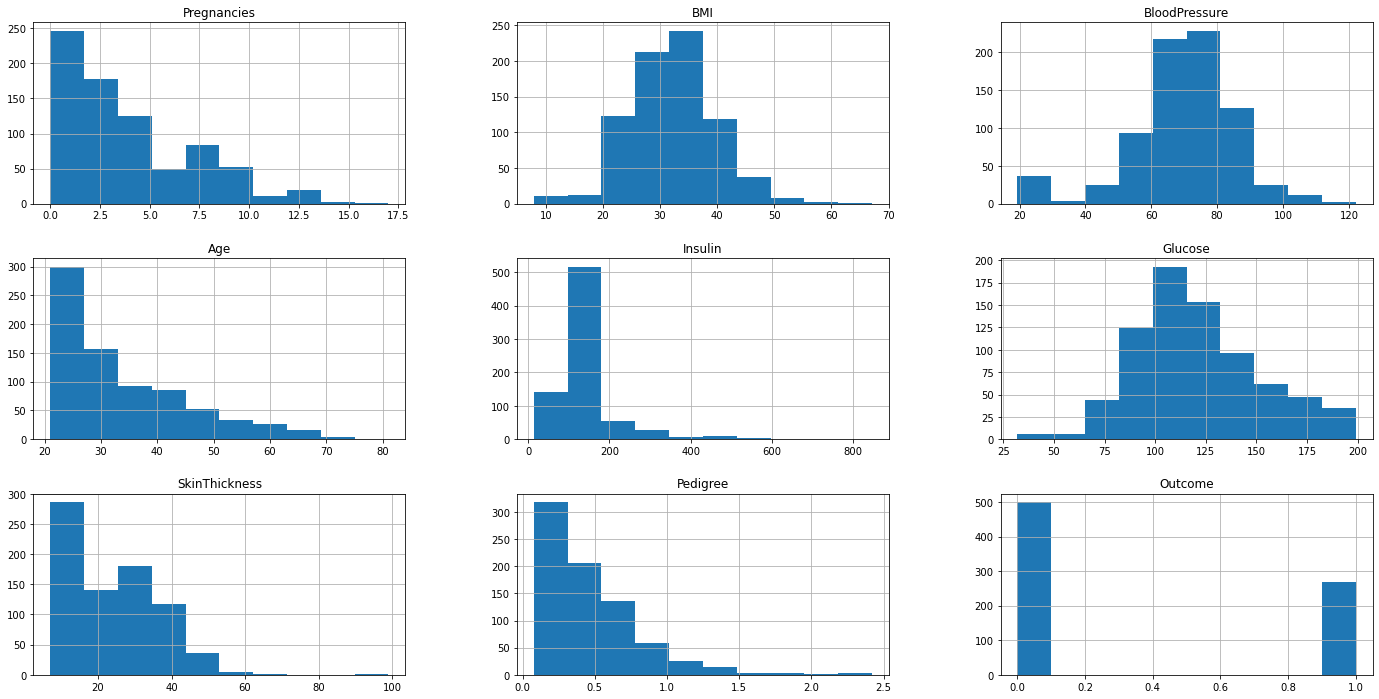

In [423]:
dependence = list(set(df.columns))
df[dependence].hist(figsize=(24,12))
pass

**Большинство атрибутов распределены стандартным образом:
Атрибуты 'BMI', 'BloodPressure', 'Glucose' примерно распределены нормально,
Атрибуты 'Pregnacies', 'Age', 'SkinThickness' примерно распределены экспоненциально**

## Подключение необходимых библиотек для реализации алгоритма K ближайших соседей.

In [424]:
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

**Задаём исходные данные: количество атрибутов и число соседей**

In [425]:
n = 8
k = 43

**Реализация алгоритма knn с помощью метода библиотеки sklearn**

In [426]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, n].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,  random_state=0)
func_scaler = StandardScaler()
X_train = func_scaler.fit_transform(X_train)
X_test = func_scaler.fit_transform(X_test)
Z_train, Z_test = np.concatenate((X_train, Y_train[:,None]), axis=1), np.concatenate((X_test, Y_test[:,None]), axis=1)
df_list_train = list(zip(Y_train, X_train))
df_list_test = list(zip(Y_test, X_test))
standard_classifier = KNeighborsClassifier(metric = 'euclidean', p = 4, n_neighbors=k)
standard_classifier.fit(X_train, Y_train)
Y_pred = standard_classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_pred,Y_test)   

**Подсчёт и вывод результатов в реализации через стандартный метод библиотеки sklearn**

In [427]:
res_confusion_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(res_confusion_matrix)
res_classification_report = classification_report(Y_test, Y_pred)
print("                  Classification Report:",)
print(res_classification_report)
res_accuracy_score = accuracy_score(Y_test,Y_pred)
print("Standard knn classifier (accuracy score):", res_accuracy_score, "with k =", k)

Confusion Matrix:
[[75  3]
 [16 22]]
                  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        78
           1       0.88      0.58      0.70        38

    accuracy                           0.84       116
   macro avg       0.85      0.77      0.79       116
weighted avg       0.84      0.84      0.83       116

Standard knn classifier (accuracy score): 0.8362068965517241 with k = 43


**Подсчёт и вывод результатов в моей реализации алгоритма**

In [428]:
def my_knn_accuracy (df, p, k):
    elem_distance = []
    for element in df:
        euclidean_distance = math.sqrt(
            (element[1][0] - p[0]) ** 2 + (element[1][1] - p[1]) ** 2 + (element[1][2] - p[2]) ** 2 + (element[1][3] - p[3]) ** 2 +
            (element[1][4] - p[4]) ** 2 + (element[1][5] - p[5]) ** 2 + (element[1][6] - p[6]) ** 2 + (element[1][7] - p[7]) ** 2)
        elem_distance.append((euclidean_distance, element[0]))
    elem_distance = sorted(elem_distance)[:k]
    count_1 = 0
    count_2 = 0
    for d in elem_distance:
        if d[1] == 0:
            count_1 += (1 / d[0])
        elif d[1] == 1:
            count_2 += (1 / d[0])
    return 0 if count_1 > count_2 else 1
my_accuracy = 0
for element in df_list_test:
    if element[0] == my_knn_accuracy(df_list_train, element[1], k):
        my_accuracy += 1       
print("My knn classifier (accuracy score):", my_accuracy / len(df_list_test), "with k =", k)

My knn classifier (accuracy score): 0.8362068965517241 with k = 43


**Построение графика зависимости величины ошибки (Error Rate) от количества соседей (K Neighbours)**

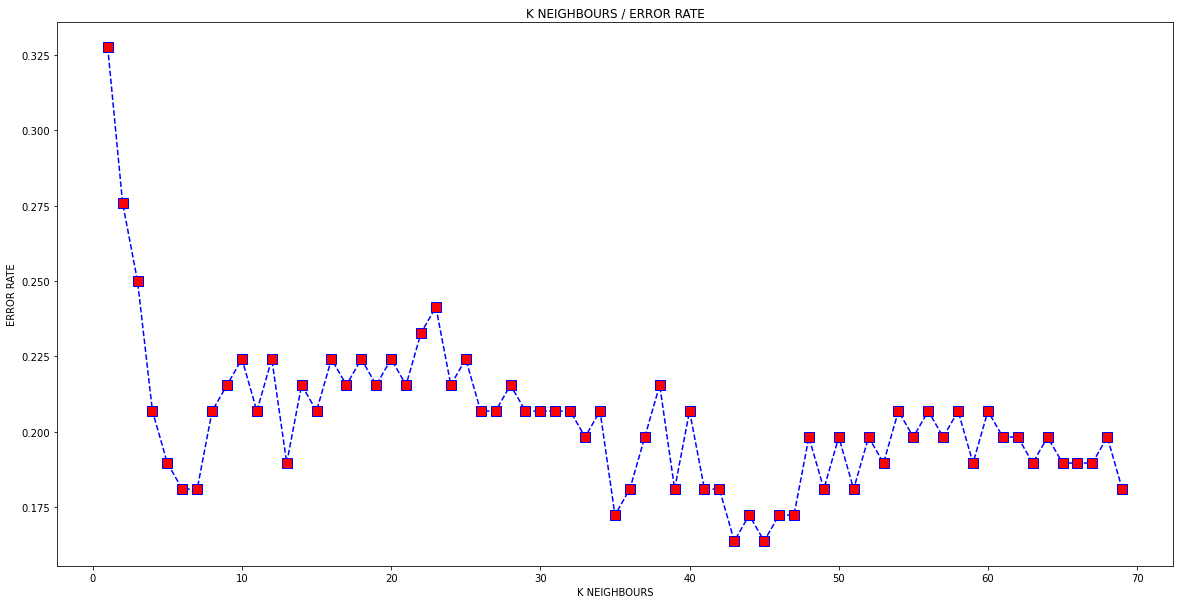

In [429]:
err_rate = []
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(20, 10))
plt.plot(range(1, 70), error, color='blue', linestyle='dashed', marker='s', markerfacecolor='red', markersize=10)
plt.title('K NEIGHBOURS / ERROR RATE')
plt.xlabel('K NEIGHBOURS')
plt.ylabel('ERROR RATE')
pass

**Ошибка произойдёт с наименьшей вероятностью при количестве соседей = 43 и 45**

## Подключение необходимых библиотек для реализации Байесовского классификатора

In [384]:
from math import sqrt
from math import exp
from math import pi
import random
from sklearn.naive_bayes import GaussianNB

**Реализация необходимых функций**

In [388]:
#Функция разделения набора для обучения на классы
def separate_by_class(dataset):
    tmp_dict = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_type = vector[-1]
        if (class_type not in tmp_dict):
            tmp_dict[class_type] = list()
        tmp_dict[class_type].append(vector)
    return tmp_dict

#Расчёт среднего для атрибутов
def average(numbers):
    return sum(numbers) / float(len(numbers))

#Расчёт стандартного отклонения для атрибутов
def standard_deviation(numbers):
    avg = average(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
    return sqrt(variance)

#Расчёт average и standard_deviation
def attributes_count(dataset):
    summaries = [(average(column), standard_deviation(column), len(column)) for column in zip(*dataset)]
    del (summaries[-1])
    return summaries


#Разделение исходного набора данных на классы с последующим подсчётом attributes_count
def attributes_by_class(dataset):
    classed = separate_by_class(dataset)
    result = dict()
    for class_value, rows in classed.items():
        result[class_value] = attributes_count(rows)
    return result

#Функция Гаусса плотности вероятности
def calculate_prob(x, average, standard_deviation):
    tmp_value = exp(-((x - average) ** 2 / (2 * standard_deviation ** 2)))
    return (1 / (sqrt(2 * pi) * standard_deviation)) * tmp_value

#Взаимно однозначное отображение по вероятности
def class_probs(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2] / float(total_rows)
        for i in range(len(class_summaries)):
            average, standard_deviation, _ = class_summaries[i]
            probabilities[class_value] *= calculate_prob(row[i], average, standard_deviation)
    return probabilities

#Функция предсказания
def predict(summaries, row):
    probabilities = class_probs(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

**Подсчёт и вывод результатов в реализации через стандартный метод библиотеки sklearn**

In [389]:
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
standard_success = 0
my_success = 0
for i, j in zip(Y_test, Y_pred):
    if i == j:
        standard_success += 1
print("Standard Bayesian classifier:", standard_success / len(Y_pred))

Standard Bayesian classifier: 0.7931034482758621


**Подсчёт и вывод результатов в моей реализации алгоритма**

In [390]:
model = attributes_by_class(Z_train)
for i in Z_test:
    if i[-1] == predict(model, i):
        my_success += 1
print("My Bayesian classifier:", my_success / len(Z_test))

My Bayesian classifier: 0.7931034482758621
